<a href="https://colab.research.google.com/github/nrutyadoshi/NLP/blob/Lab/Nlp_Lab_1_WorldCloud_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
data = pd.read_json("http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Office_Products_5.json.gz",lines=True)

In [0]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [0]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

In [0]:
data = data.iloc[:50]
data.shape

(50, 9)

In [0]:
str = data.reviewText[0]

In [96]:
sents = nltk.sent_tokenize(str)
sents

['I bought my first HP12C in about 1984 or so, and it served me faithfully until 2002 when I lost it while travelling.',
 'I searched for another one to replace it, but found one difficult to come by in my area.',
 'So, I decided to buy up and purchased an HP 49G.',
 'What a mistake!',
 'I know that many people view the HP 49G (now 49G+) as the flagship of the HP line, but for me that was a disaster.The 49G may be powerful, but using it is extremely counterintuitive...and the manual was sketchy at best.',
 'The 12C, on the other hand, does what I need in a way that makes good sense to me.If you are looking for a solid, reliable calculator, the HP12C may be for you.',
 "It's programmable.",
 'It does basic statistics well, and many business applications too.',
 "The manual makes sense; you will be up and running in short order.I'm ready to set my 49G aside and move back to my old friend.",
 "I didn't even have to replace the batteries in well over a decade of use!HP 12C, I'm coming home

In [0]:
def pre_processing(str):
  stopword = stopwords.words('english') 
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  sents = nltk.sent_tokenize(str)
  removed = []
  for sent in sents:
      removed.append(' '.join(w for w in nltk.word_tokenize(sent) if (w.lower() not in stopword and w.lower() not in punctuations )))
  return(removed)

In [0]:
clean_data = pre_processing(str)

In [0]:
import matplotlib.pyplot as plt

In [0]:
from wordcloud import WordCloud

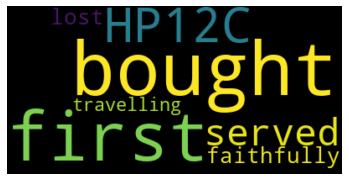

In [123]:
wordcloud = WordCloud().generate(clean_data[0])

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
import gensim 
from gensim.models import Word2Vec 

In [0]:
model = Word2Vec([clean_data],min_count=1)

In [118]:
model.wv.vocab

{"'s programmable": <gensim.models.keyedvectors.Vocab at 0x7fdce0fb5e80>,
 '12C hand need way makes good sense me.If looking solid reliable calculator HP12C may': <gensim.models.keyedvectors.Vocab at 0x7fdce0fb5550>,
 'basic statistics well many business applications': <gensim.models.keyedvectors.Vocab at 0x7fdce0fb5d68>,
 'bought first HP12C 1984 served faithfully 2002 lost travelling': <gensim.models.keyedvectors.Vocab at 0x7fdce0fb5898>,
 'decided buy purchased HP 49G': <gensim.models.keyedvectors.Vocab at 0x7fdce0fb5668>,
 'know many people view HP 49G 49G+ flagship HP line disaster.The 49G may powerful using extremely counterintuitive ... manual sketchy best': <gensim.models.keyedvectors.Vocab at 0x7fdce0fb5b00>,
 "manual makes sense running short order.I 'm ready set 49G aside move back old friend": <gensim.models.keyedvectors.Vocab at 0x7fdce0fb5e10>,
 'mistake': <gensim.models.keyedvectors.Vocab at 0x7fdce0fb5c88>,
 "n't even replace batteries well decade use HP 12C 'm coming h

In [125]:
for i in clean_data[0:10]:
  for j in clean_data[1:10]:
    if(i<j):
      print(model.wv.similarity(w1=i,w2=j))

-0.17393075
0.11301231
0.051907174
0.012249056
0.11438904
0.05549116
-0.06903883
0.22654408
-0.12600566
-0.095161766
0.15038681
0.06010738
0.03726177
0.09980889
-0.15172483
0.013306253
-0.122246586
0.0026558791
-0.01754791
0.09465568
-0.10713379
0.107429706
0.19232965
0.10963241
0.121655434
-0.05436581
-0.072640315
-0.07667547
0.038768984
0.04218186
0.005654101
-0.11135098
-0.030261097
0.056236025
-0.080983646
-0.060710404
-0.16174057
-0.09500362
0.012842685
0.14830334
0.005506738
-0.114344954


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
